In [2]:
#| Import the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

In [4]:
#df=pd.read_csv('titanic.csv')
#df=pd.read_excel('titanic.xlsx')
df=pd.read_clipboard()
df

EmptyDataError: No columns to parse from file

In [4]:
df

,TEAMS,W,L,PT
0,1 Delhi Capitals,10,4,20
1,2 Chennai Super Kings,9,5,18
2,3 Royal Challengers Bangalore,9,5,18
3,4 Kolkata Knight Riders,7,7,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEAMS   4 non-null      object
 1   W       4 non-null      int64 
 2   L       4 non-null      int64 
 3   PT      4 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 256.0+ bytes


In [7]:
df['L']=df['L'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEAMS   4 non-null      object 
 1   W       4 non-null      int64  
 2   L       4 non-null      float64
 3   PT      4 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 256.0+ bytes


In [9]:
df.head()

,TEAMS,W,L,PT
0,1 Delhi Capitals,10,4.0,20
1,2 Chennai Super Kings,9,5.0,18
2,3 Royal Challengers Bangalore,9,5.0,18
3,4 Kolkata Knight Riders,7,7.0,14


In [6]:
df.dtypes

TEAMS    object
W         int64
L         int64
PT        int64
dtype: object

In [13]:
cat=df.select_dtypes(include=['object'])
cat

,TEAMS
0,1 Delhi Capitals
1,2 Chennai Super Kings
2,3 Royal Challengers Bangalore
3,4 Kolkata Knight Riders


In [15]:
cat=df.select_dtypes(include=['object']).columns.to_list()
cat

['TEAMS']

In [18]:
num=df.select_dtypes(include=[np.number])
num

,W,L,PT
0,10,4.0,20
1,9,5.0,18
2,9,5.0,18
3,7,7.0,14


In [20]:
df.describe(include='all')

,TEAMS,W,L,PT
count,4,4.000000,4.000000,4.000000
unique,4,NaN,NaN,NaN
top,1 Delhi Capitals,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,8.750000,5.250000,17.500000
std,NaN,1.258306,1.258306,2.516611
min,NaN,7.000000,4.000000,14.000000
25%,NaN,8.500000,4.750000,17.000000
50%,NaN,9.000000,5.000000,18.000000
75%,NaN,9.250000,5.500000,18.500000


In [6]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.shape

(891, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [10]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [11]:
# check for the data types and correct the mismatched one
df=df.drop(['pclass','adult_male','embarked','alive'],axis=1)
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,NaN,Southampton,True


In [12]:
df=df.drop(['deck'],axis=1)

In [13]:
df.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
embark_town      2
alone            0
dtype: int64

In [14]:
# drop the rows where there is null values 
df=df.dropna(axis=0)

In [15]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
embark_town    0
alone          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   sex          712 non-null    object  
 2   age          712 non-null    float64 
 3   sibsp        712 non-null    int64   
 4   parch        712 non-null    int64   
 5   fare         712 non-null    float64 
 6   class        712 non-null    category
 7   who          712 non-null    object  
 8   embark_town  712 non-null    object  
 9   alone        712 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 51.6+ KB


In [17]:
df['survived']=df['survived'].astype('object')
df['age']=df['age'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    object  
 1   sex          712 non-null    object  
 2   age          712 non-null    int32   
 3   sibsp        712 non-null    int64   
 4   parch        712 non-null    int64   
 5   fare         712 non-null    float64 
 6   class        712 non-null    category
 7   who          712 non-null    object  
 8   embark_town  712 non-null    object  
 9   alone        712 non-null    bool    
dtypes: bool(1), category(1), float64(1), int32(1), int64(2), object(4)
memory usage: 48.8+ KB


In [19]:
cat=df.select_dtypes(exclude=np.number)
num=df.select_dtypes(include=np.number)

In [20]:
cat.head(2)

,survived,sex,class,who,embark_town,alone
0,0,male,Third,man,Southampton,False
1,1,female,First,woman,Cherbourg,False


In [21]:
num.head(2)

,age,sibsp,parch,fare
0,22,1,0,7.2500
1,38,1,0,71.2833


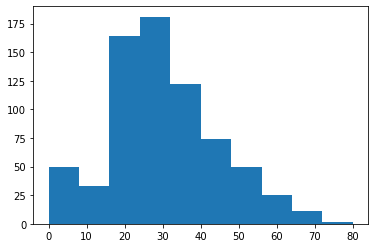

In [22]:
plt.hist(df['age'])
plt.show()

In [23]:
df[(df['age']>0) & (df['age']<=10)].shape

(57, 10)

In [24]:
len(df[(df['age']>0) & (df['age']<=10)])

57

In [25]:
df['age'].mode()

0    24
Name: age, dtype: int32

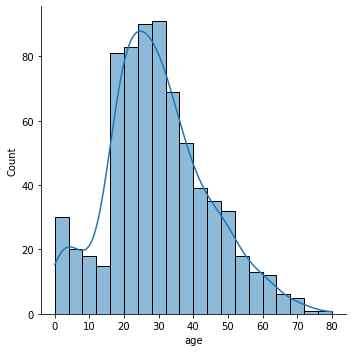

In [26]:
sns.displot(df['age'],kde=True)

C:\Users\Classroom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

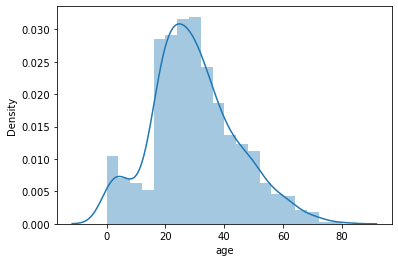

In [27]:
sns.distplot(df['age'])

In [28]:
df['age'].skew()

0.3836449425172507

In [29]:
df['fare'].skew()

4.667008753630038

###### fare has high positive skewness indicating the presence of outlier at the right end 

In [30]:
df['age'].kurt()

0.1921573137216286

In [31]:
df['fare'].kurt()

31.01337652541288

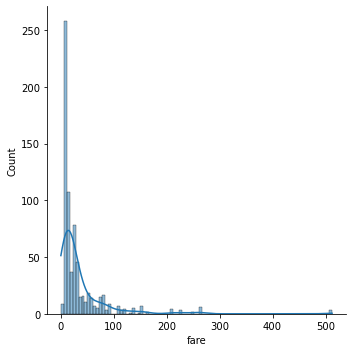

In [32]:
sns.displot(df['fare'],kde=True)

In [33]:
df['fare'].mean()

34.56725140449432

In [34]:
import scipy 
from scipy import stats
stats.trim_mean(df['fare'],proportiontocut=0.1)

22.995365087719293

In [106]:
import sklearn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [107]:
cat

,survived,sex,class,who,embark_town,alone
0,0,male,Third,man,Southampton,False
1,1,female,First,woman,Cherbourg,False
2,1,female,Third,woman,Southampton,True
3,1,female,First,woman,Southampton,False
4,0,male,Third,man,Southampton,True
...,...,...,...,...,...,...
885,0,female,Third,woman,Queenstown,False
886,0,male,Second,man,Southampton,True
887,1,female,First,woman,Southampton,True
889,1,male,First,man,Cherbourg,True


In [108]:
dummy=pd.get_dummies(df['sex'],drop_first=True)

In [109]:
len(dummy)

712

In [110]:
#pd.get_dummies(df['sex'],drop_first=True)

In [111]:
df1=pd.concat([df,dummy],axis=1)

In [112]:
len(df1)

712

In [113]:
df1=df1.drop(['sex'],axis=1)

In [114]:
df1['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

In [115]:
len(df1)

712

In [125]:
import sklearn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [126]:
oh=OneHotEncoder()
dummy1=pd.DataFrame(oh.fit_transform(df1[['who']]).toarray(),columns=['child','man','woman'])

In [127]:
dummy1.shape

(712, 3)

In [128]:
df2=pd.concat([dummy1,df1.reset_index(drop=True)],axis=1)
df2.head(2)

,child,man,woman,survived,age,sibsp,parch,fare,class,who,embark_town,alone,male
0,0.0,1.0,0.0,0,22,1,0,7.2500,Third,man,Southampton,False,1
1,0.0,0.0,1.0,1,38,1,0,71.2833,First,woman,Cherbourg,False,0


In [129]:
df2=df2.drop('who',axis=1)

In [130]:
df2.head()

,child,man,woman,survived,age,sibsp,parch,fare,class,embark_town,alone,male
0,0.0,1.0,0.0,0,22,1,0,7.2500,Third,Southampton,False,1
1,0.0,0.0,1.0,1,38,1,0,71.2833,First,Cherbourg,False,0
2,0.0,0.0,1.0,1,26,0,0,7.9250,Third,Southampton,True,0
3,0.0,0.0,1.0,1,35,1,0,53.1000,First,Southampton,False,0
4,0.0,1.0,0.0,0,35,0,0,8.0500,Third,Southampton,True,1


In [131]:
dummy3=pd.DataFrame(oh.fit_transform(df2[['embark_town']]).toarray(),columns=['c','q','s'])
dummy3

,c,q,s
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
707,0.0,1.0,0.0
708,0.0,0.0,1.0
709,0.0,0.0,1.0
710,1.0,0.0,0.0


In [132]:
df2=pd.concat([dummy3,df2.reset_index(drop=True)],axis=1)

In [133]:
df2.columns

Index(['c', 'q', 's', 'child', 'man', 'woman', 'survived', 'age', 'sibsp',
       'parch', 'fare', 'class', 'embark_town', 'alone', 'male'],
      dtype='object')

In [134]:
df2=df2.drop('embark_town',axis=1)

In [ ]:
# Ordinal data

In [136]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [137]:
df2.columns

Index(['c', 'q', 's', 'child', 'man', 'woman', 'survived', 'age', 'sibsp',
       'parch', 'fare', 'class', 'alone', 'male'],
      dtype='object')

In [138]:
le=LabelEncoder()
df2['class_encoded']=le.fit_transform(df2['class'])

In [139]:
df2.head(2)

,c,q,s,child,man,woman,survived,age,sibsp,parch,fare,class,alone,male,class_encoded
0,0.0,0.0,1.0,0.0,1.0,0.0,0,22,1,0,7.2500,Third,False,1,2
1,1.0,0.0,0.0,0.0,0.0,1.0,1,38,1,0,71.2833,First,False,0,0


In [149]:
oe=OrdinalEncoder()
df2['class_encoded_ordinal']=oe.fit_transform(df2[['class']])

In [150]:
df2.head()

,c,q,s,child,man,woman,survived,age,sibsp,parch,fare,class,alone,male,class_encoded,class_encoded_ordinal,class_encoded_ordinal_spcl
0,0.0,0.0,1.0,0.0,1.0,0.0,0,22,1,0,7.2500,Third,False,1,2,2.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1,38,1,0,71.2833,First,False,0,0,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1,26,0,0,7.9250,Third,True,0,2,2.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1,35,1,0,53.1000,First,False,0,0,0.0,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0,35,0,0,8.0500,Third,True,1,2,2.0,0.0


In [151]:
oe=OrdinalEncoder(categories=[['Third','Second','First']])
df2['class_encoded_ordinal_spcl']=oe.fit_transform(df2[['class']])

In [152]:
df2.head()

,c,q,s,child,man,woman,survived,age,sibsp,parch,fare,class,alone,male,class_encoded,class_encoded_ordinal,class_encoded_ordinal_spcl
0,0.0,0.0,1.0,0.0,1.0,0.0,0,22,1,0,7.2500,Third,False,1,2,2.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1,38,1,0,71.2833,First,False,0,0,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1,26,0,0,7.9250,Third,True,0,2,2.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1,35,1,0,53.1000,First,False,0,0,0.0,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0,35,0,0,8.0500,Third,True,1,2,2.0,0.0


In [ ]:
df['class'].replace({'first':1,'second':2,'third':3})